In [ ]:
from random import randint
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from nltk import tokenize
from tensorflow import keras
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report, confusion_matrix
from nltk import pos_tag
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

data = pd.read_csv("sample.csv", delimiter='\t', encoding='utf-8')

# Data Preparation

# Removing id and title

data.drop(["title"], axis=1, inplace=True)
data.drop(["public_id"], axis=1, inplace=True)

In [ ]:
data['text'] = data['text'].apply(lambda x: x.lower())

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str


data['text'] = data['text'].apply(punctuation_removal)

stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))


def line_removal(text):
    all_list = [char for char in text if char not in "-–—_"]
    clean_str = ''.join(all_list)
    return clean_str


data['text'] = data['text'].apply(line_removal)

data['text'] = [word_tokenize(entry) for entry in data['text']]

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['ADJ'] = wn.ADJ
tag_map['VERB'] = wn.VERB
tag_map['ADV'] = wn.ADV

for index, entry in enumerate(data['text']):
    final_words = ""
    word_lemmatized = WordNetLemmatizer()

    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            final_word = word_lemmatized.lemmatize(word, tag_map[tag[0]])
            final_words += final_word + " "

    data.loc[index, 'text'] = final_words

print(data['text'])

tokenizer = Tokenizer()

tokenizer.fit_on_texts(data['text'])

encoded_docs_binary = tokenizer.texts_to_matrix(data['text'], mode="binary")
# print(encoded_docs_binary)

encoded_docs_count = tokenizer.texts_to_matrix(data['text'], mode="count")
# print(encoded_docs_count)

encoded_docs_freq = tokenizer.texts_to_matrix(data['text'], mode="freq")
# print(encoded_docs_freq)

encoded_docs_tfidf = tokenizer.texts_to_matrix(data['text'], mode="tfidf")
# print(encoded_docs_tfidf)

0     last week rep louie gohmert told chris salcedo...
1     whatever drama play republican meet cleveland ...
2     merchant democratrun city boarding storefront ...
3     state dining room pm est president good aftern...
4     natural news study published journal clinical ...
5     latest breaking news martial law imminent gene...
6     smoking could considered distraction road rule...
7     gov scott walker said friday presidential camp...
8     please share story dr russell blaylock warns f...
9     knew joe biden vicepresidential pick going nra...
10    article updated include context directive well...
11    america never socialist country president trum...
12    wisconsin trump failed response crushed farmer...
13    vaccine manufacturer merck abandoned developme...
14    u senator tammy baldwin stand wisconsin dairy ...
15    washington dc narrowly winning aug special ele...
16    united nation using coronavirus aid fund abort...
17    hal turner chinese soldier bombed killed m

In [ ]:
for i in range(len(data['our rating'])):
    if data['our rating'][i] == "FALSE":
        data['our rating'][i] = 0
    elif data['our rating'][i] == "TRUE":
        data['our rating'][i] = 1
    else:
        data['our rating'][i] = 2

data['our rating'] = data['our rating'].astype('int')

In [ ]:
for i in range(len(data['our rating'])):
    if data['our rating'][i] == "FALSE":
        data['our rating'][i] = 0
    elif data['our rating'][i] == "TRUE":
        data['our rating'][i] = 1
    else:
        data['our rating'][i] = 0

data['our rating'] = data['our rating'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(encoded_docs_binary, data['our rating'], test_size=0.2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(encoded_docs_count, data['our rating'], test_size=0.2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(encoded_docs_freq, data['our rating'], test_size=0.2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(encoded_docs_tfidf, data['our rating'], test_size=0.2)

In [ ]:
DT_params = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions={
    "max_depth": [1, 2, 3],
    "min_samples_split": [2, 3, 4, 5]
}, n_iter=12, n_jobs=-1)

result = DT_params.fit(x_train, y_train)
result2 = pd.DataFrame(result.cv_results_).loc[[result.best_index_]]

my_decision_tree = DecisionTreeClassifier()

my_decision_tree.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
result2['params']

4    {'min_samples_split': 2, 'max_depth': 2}
Name: params, dtype: object

In [ ]:
my_decision_tree = DecisionTreeClassifier(max_depth = 2, min_samples_split = 2)
my_decision_tree.fit(x_train, y_train)

print(classification_report(y_test, my_decision_tree.predict(x_test), zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
SVM_params = RandomizedSearchCV(estimator=svm.SVC(probability=True), param_distributions={
    "C": [0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2],
    "kernel": ["linear", "poly", "rbf"]
}, n_iter=24, n_jobs=-1)

result3 = SVM_params.fit(x_train, y_train)
result4 = pd.DataFrame(result3.cv_results_).loc[[result3.best_index_]]

ValueError: ignored

In [ ]:
result4["params"]

0    {'kernel': 'linear', 'C': 0.1}
Name: params, dtype: object

In [ ]:
my_svm = svm.SVC(probability = True, C = 0.1, kernel = "linear")
my_svm.fit(x_train, y_train)

print(classification_report(y_test, my_svm.predict(x_test), zero_division=0))

ValueError: ignored

In [ ]:
my_nb = ComplementNB()
my_nb.fit(x_train, y_train)

print(classification_report(y_test, my_nb.predict(x_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.60      1.00      0.75         3
           2       0.50      0.33      0.40         3

    accuracy                           0.60        10
   macro avg       0.59      0.61      0.57        10
weighted avg       0.60      0.60      0.57        10



In [ ]:
KNN_params = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions={
    "leaf_size": list(range(1, 50)),
    "n_neighbors": list(range(1, 30)),
    "p": [1, 2]
}, n_iter=50, n_jobs=-1)

result5 = KNN_params.fit(x_train, y_train)
result6 = pd.DataFrame(result5.cv_results_).loc[[result5.best_index_]]

In [ ]:
result6["params"]

1    {'p': 2, 'n_neighbors': 12, 'leaf_size': 40}
Name: params, dtype: object

In [ ]:
my_knn = KNeighborsClassifier(p = 2, n_neighbors = 12, leaf_size = 40)
my_knn.fit(x_train, y_train)

print(classification_report(y_test, my_knn.predict(x_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57         4
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3

    accuracy                           0.40        10
   macro avg       0.13      0.33      0.19        10
weighted avg       0.16      0.40      0.23        10



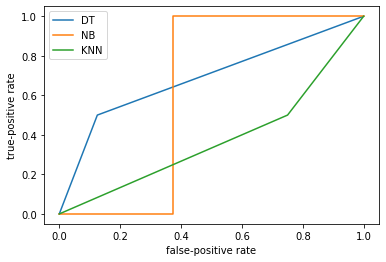

AUC for DT: 0.687500
AUC for NB: 0.625000
AUC for KNN: 0.375000


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
a, b, c = roc_curve(y_test, my_decision_tree.predict_proba(x_test)[:,1])
a1, b1, c1 = roc_curve(y_test, my_nb.predict_proba(x_test)[:,1])
a2, b2, c2 = roc_curve(y_test, my_knn.predict_proba(x_test)[:,1])

plt.plot(a, b)
plt.plot(a1, b1)
plt.plot(a2, b2)

plt.legend(["DT", "NB", "KNN"])
plt.xlabel("false-positive rate")
plt.ylabel("true-positive rate")
plt.show()

print("AUC for DT: %f" % roc_auc_score(y_test, my_decision_tree.predict_proba(x_test)[:,1]))
print("AUC for NB: %f" % roc_auc_score(y_test, my_nb.predict_proba(x_test)[:,1]))
print("AUC for KNN: %f" % roc_auc_score(y_test, my_knn.predict_proba(x_test)[:,1]))